## Customer Segmentation Using K-Means Clustering

I developed a customer segmentation model using the K-Means clustering algorithm to group customers based on behavioral features.

### Dataset Overview

The dataset included customer information such as:
- Age
- Gender
- Annual Income (k$)
- Spending Score (1–100)

These features were used to analyze patterns in customer behavior.

### Data Preprocessing

To ensure the model's performance:
- I first **cleaned and preprocessed** the data.
- **Outliers** were identified and removed using the **Interquartile Range (IQR)** method to avoid distortion in clustering.
- **Min-Max Scaling** was applied to normalize feature values so that all variables had equal influence during clustering.

### Determining Optimal Clusters

To identify the appropriate number of clusters:
- I calculated the **Within-Cluster Sum of Squares (WCSS)** for different values of K.
- An **Elbow Curve** was plotted to observe the point where adding more clusters did not significantly reduce WCSS.
- From the plot, the optimal number of clusters was found to be **K = 5**.

### Model Training and Visualization

- The **K-Means algorithm** was applied with K = 5.
- Customers were grouped into five distinct clusters.
- The resulting clusters were visualized using a **scatter plot** based on features like Annual Income and Spending Score, helping to distinguish different customer types.

### Outcome

This project successfully segmented customers into behavior-based groups using unsupervised learning. These segments can assist in marketing, customer relationship management, and personalization strategies.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df.drop(columns = ["CustomerID"], axis = 1, inplace = True)

In [ ]:
df.sample(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
156,Male,37,78,1
149,Male,34,78,90
1,Male,21,15,81
24,Female,54,28,14
162,Male,19,81,5


In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [ ]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]


    return outlier_count

In [ ]:
outlier_summary = []

for col in df.columns:
    total_rows = df[col].shape[0]
    outliers = find_outliers_iqr(df, col)
    outlier_summary.append({
        'Column': col,
        'Total Rows': total_rows,
        'Outliers': outliers
    })



In [ ]:
outlier_df = pd.DataFrame(outlier_summary)
outlier_df

,Column,Total Rows,Outliers
0,Gender,200,0
1,Age,200,0
2,Annual Income (k$),200,2
3,Spending Score (1-100),200,0


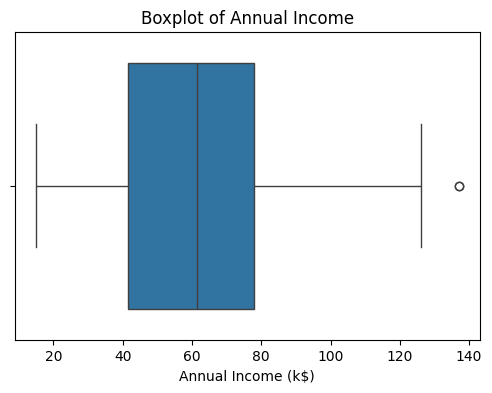

In [ ]:

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Boxplot of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.show()

In [ ]:
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['Annual Income (k$)'] >= lower_bound) & (df['Annual Income (k$)'] <= upper_bound)]

In [ ]:
df_cleaned

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
193,0,38,113,91
194,0,47,120,16
195,0,35,120,79
196,0,45,126,28


In [ ]:
X = df_cleaned.iloc[:,[2,3]].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(X)

In [ ]:
scaled_df

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00900901, 0.05102041],
       [0.00900901, 0.7755102 ],
       [0.01801802, 0.39795918],
       [0.01801802, 0.76530612],
       [0.02702703, 0.05102041],
       [0.02702703, 0.94897959],
       [0.03603604, 0.02040816],
       [0.03603604, 0.7244898 ],
       [0.03603604, 0.13265306],
       [0.03603604, 1.        ],
       [0.04504505, 0.14285714],
       [0.04504505, 0.7755102 ],
       [0.04504505, 0.12244898],
       [0.04504505, 0.79591837],
       [0.05405405, 0.34693878],
       [0.05405405, 0.66326531],
       [0.07207207, 0.28571429],
       [0.07207207, 0.98979592],
       [0.08108108, 0.34693878],
       [0.08108108, 0.73469388],
       [0.09009009, 0.04081633],
       [0.09009009, 0.73469388],
       [0.11711712, 0.13265306],
       [0.11711712, 0.82653061],
       [0.11711712, 0.31632653],
       [0.11711712, 0.6122449 ],
       [0.12612613, 0.30612245],
       [0.12612613, 0.87755102],
       [0.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(scaled_df)

  wcss.append(kmeans.inertia_)

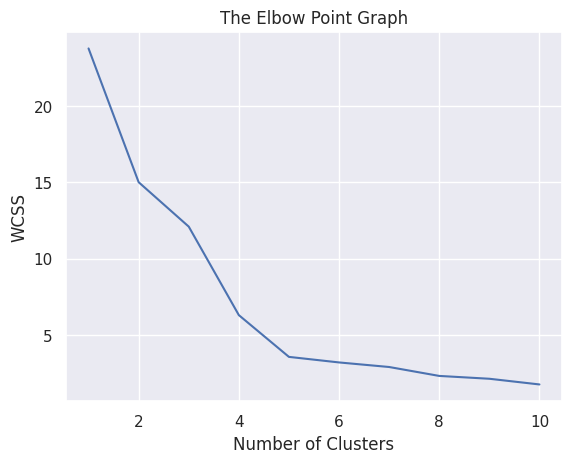

In [ ]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(scaled_df)

print(Y)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 0 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 4 1 0 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 0 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1]


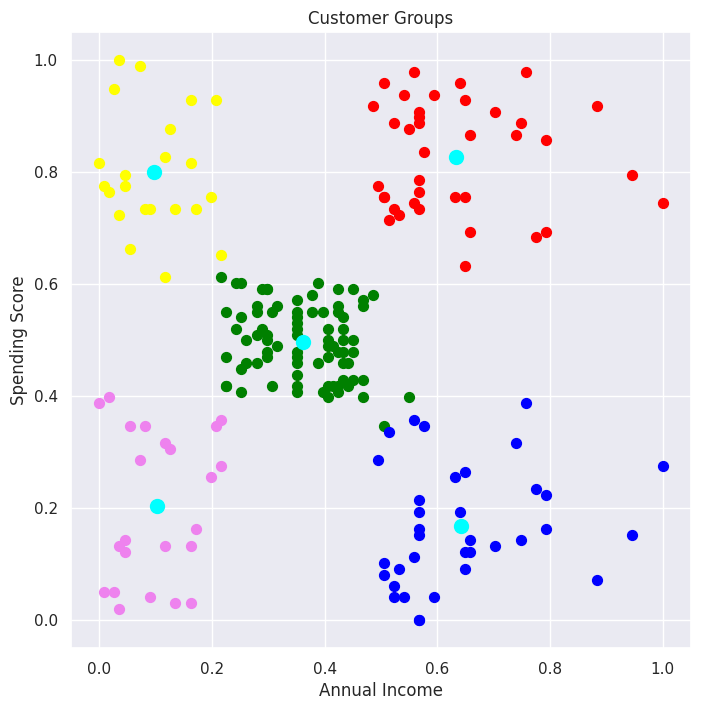

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(scaled_df[Y==0,0], scaled_df[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(scaled_df[Y==1,0], scaled_df[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(scaled_df[Y==2,0], scaled_df[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(scaled_df[Y==3,0], scaled_df[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(scaled_df[Y==4,0], scaled_df[Y==4,1], s=50, c='blue', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()